In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [16]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import L1 
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout,MaxPooling2D

In [17]:
df_train = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
df_test = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [20]:
y_train = df_train["label"]
y_test = df_test["label"]

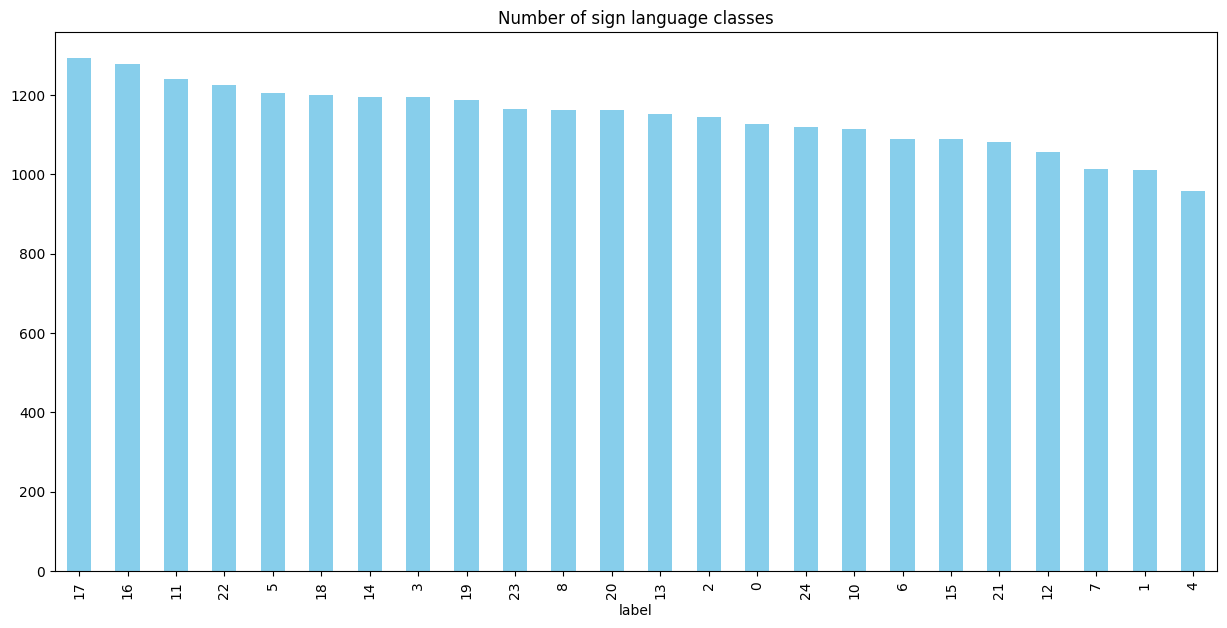

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64

In [21]:
# visiual number of Sign Language classes
plt.figure(figsize=(15,7))

y_train.value_counts().sort_values(ascending=False).plot(kind="bar",color='skyblue')
plt.title("Number of sign language classes")
plt.show()

y_train.value_counts().sort_values(ascending=False)

In [22]:
x_train=df_train.drop(["label"],axis=1,inplace=True)
x_test=df_test.drop(["label"],axis=1,inplace=True)

In [23]:
x_train = df_train.values.reshape(-1,28,28,1)
x_test = df_test.values.reshape(-1,28,28,1)

In [24]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)


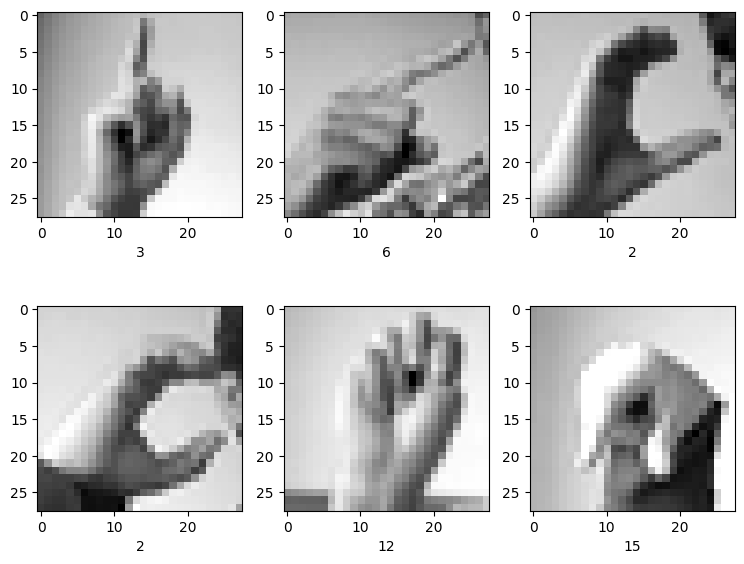

In [25]:
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(np.argmax(y_train[i]))
    
plt.show()

In [26]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                   rotation_range = 0,
#                                   height_shift_range=0.2,
#                                   width_shift_range=0.2,
#                                   shear_range=0,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True,
#                                   fill_mode='nearest')

# x_test=x_test/255

In [27]:
from tensorflow.keras import Sequential
model = Sequential()

#feature extraction
model.add(Conv2D(512, (3, 3), activation='relu', padding = 'same' ,input_shape=(28, 28, 1)))
model.add(MaxPool2D((2,2) ,  padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding = 'same',activation='relu'))
model.add(MaxPool2D(2,2) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3) , padding = 'same', activation='relu'))
model.add(MaxPool2D(2,2) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3) , padding = 'same', activation='relu'))
model.add(MaxPool2D(2,2) )
model.add(BatchNormalization())
model.add(Dropout(0.5))





#classifier

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(126, activation='relu'))
model.add(Dense(24, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [28]:
import tensorflow as tf

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 512)    │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 128)    │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 126)            │        64,638 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         3,048 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,029,606 (3.93 MB)

 Trainable params: 1,026,790 (3.92 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (21964, 28, 28, 1)
x_test shape (5491, 28, 28, 1)
y_train shape (21964, 24)
y_test shape (5491, 24)


In [31]:
history = model.fit(X_train,Y_train ,epochs = 20 , validation_data = (X_val,Y_val))
# model.fit((X_train,Y_train),
#          epochs = 35,
#           validation_data=(X_val,Y_val))
        
         


Epoch 1/20
 21/687 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0602 - loss: 4.0381 

I0000 00:00:1711832828.442518      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


687/687 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.1794 - loss: 2.9836 - val_accuracy: 0.4467 - val_loss: 2.0377
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6997 - loss: 0.8394 - val_accuracy: 0.7944 - val_loss: 0.6304
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8453 - loss: 0.4287 - val_accuracy: 0.8193 - val_loss: 0.6857
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9072 - loss: 0.2672 - val_accuracy: 0.8953 - val_loss: 0.3117
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9206 - loss: 0.2216 - val_accuracy: 0.9858 - val_loss: 0.0421
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9397 - loss: 0.1763 - val_accuracy: 0.9996 - val_loss: 0.0049
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9472 - loss: 0.1562 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9527 - loss: 0.1382 - val_accuracy: 0.9985 - va

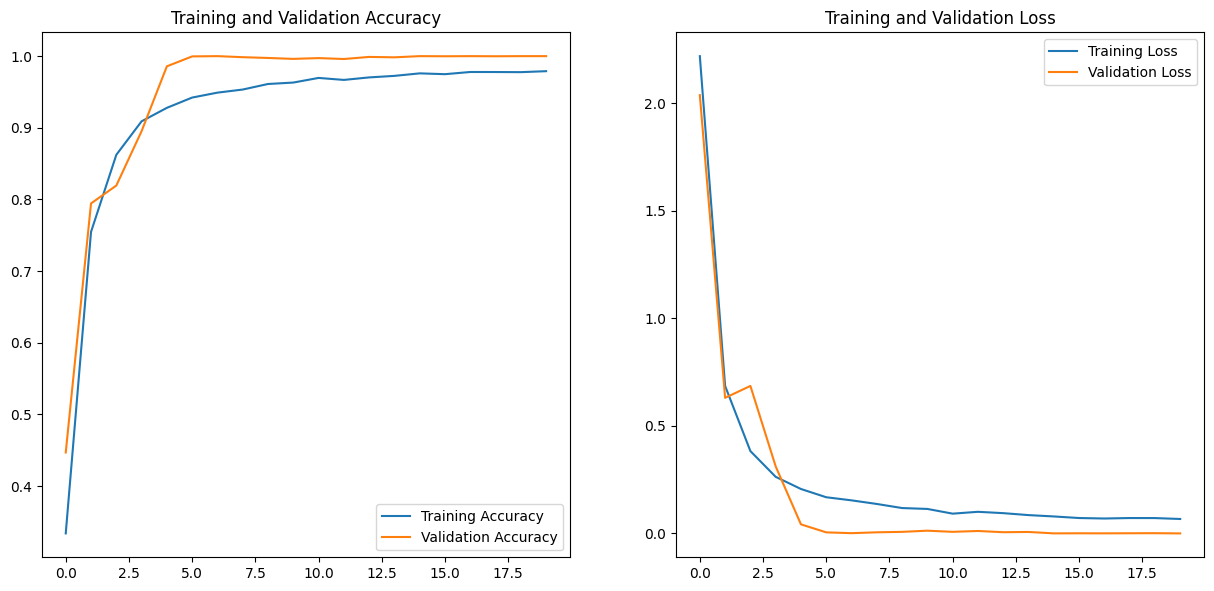

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:

y_pred = np.argmax(model.predict(x_test), axis=1)


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4326547685443391

In [40]:
y_test

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

In [41]:
y_pred

array([6, 5, 9, ..., 2, 4, 2])

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.83      1.00      0.91       348
           7       1.00      0.95      0.98       436
           8       1.00      0.96      0.98       288
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00       331
          11       0.00      0.00      0.00       209
          12       0.00      0.00      0.00       394
          13       0.00      0.00      0.00       291
          14       0.00      0.00      0.00       246
          15       0.00      0.00      0.00       347
          16       0.00      0.00      0.00       164
          17       0.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

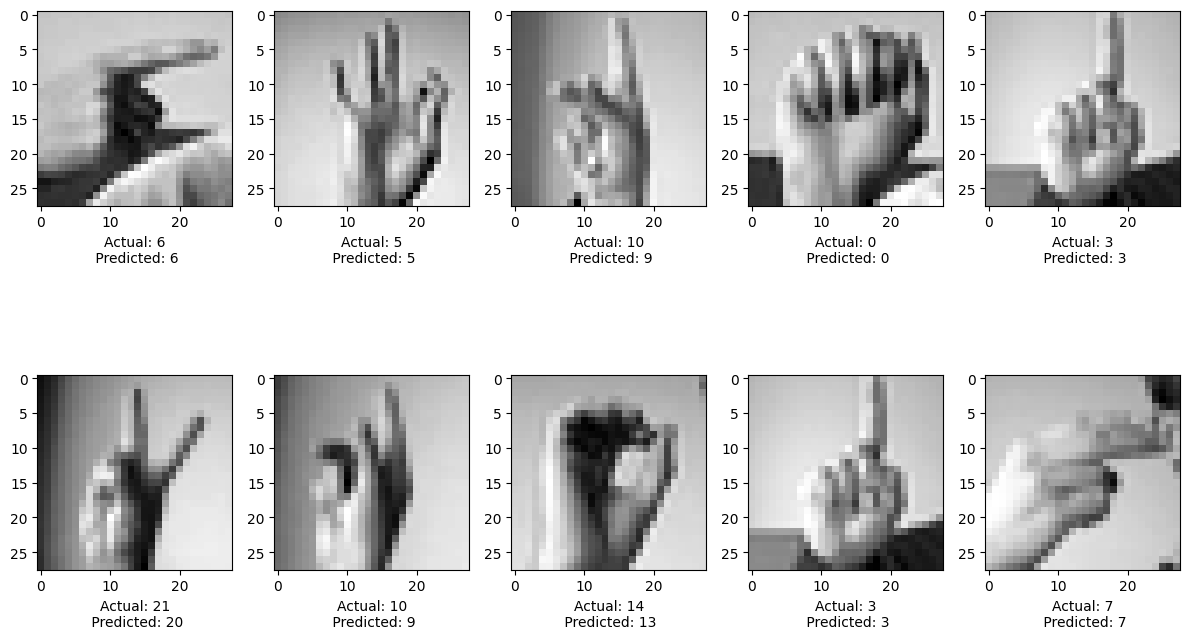

In [43]:
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i],cmap='gray')
    plt.xlabel(f"Actual: {y_test[i]}\n Predicted: {y_pred[i]}")
    
plt.tight_layout()
plt.show()